In [150]:
def decimalToBinary(num , places):
    return ('{0:0' +  str(places) + 'b}').format(num)


def binaryToDecimal(binary):
    return int(binary, 2)
        
def xorBinary(binary,key = "00000000"):
    i=0
    encBin = ""
    while(i<8):
        if(binary[i] == '0' and key[i] == '0') or (binary[i] == '1' and key[i] == '1'):
            encBin+="0"
        else:
            encBin+="1"
        i+=1
        
#     print(binary , key , encBin)    
    return encBin
    
def compressBinary(binary):
    i=0
    compressBin = ""
    while(i<8):
        if(i%2 == 0):
            if((binary[i] == '0' and binary[i+1] == '0') or (binary[i] == '1' and binary[i+1] == '1')):
                compressBin+="0"
            else:
                compressBin+="1"
        i+=1
        
    return compressBin

def to_twoscomplement(bits, value):
    if value < 0:
        value = ( 1<<bits ) + value
    formatstring = '{:0%ib}' % bits
    return formatstring.format(value)


In [55]:
import pandas as pd
article_read = pd.read_csv('dataset.csv',delimiter = ',')

# article_read['Temp.'].describe()

In [78]:
# article_read['Temp.'].describe()
# new_dataset = article_read['Temp.'].sample(100000 , random_state=101)

new_dataset = article_read['Temp.']


In [167]:
new_dataset.describe()

count    928991.000000
mean         27.283373
std           0.904537
min          24.434400
25%          26.764900
50%          27.328400
75%          27.868700
max          30.325400
Name: Temp., dtype: float64

# New Code For Delta Coding

In [139]:
int_dataset = new_dataset.astype('int64')
int_dataset.describe()

count    928991.000000
mean         26.777991
std           0.945279
min          24.000000
25%          26.000000
50%          27.000000
75%          27.000000
max          30.000000
Name: Temp., dtype: float64

In [127]:
diff_dataset = [0]
for i in range(1 , len(int_dataset)) :
        diff_dataset.append(int_dataset[i] - int_dataset[i-1])

In [128]:
diff_dataset = pd.Series(diff_dataset)

In [129]:
diff_dataset.describe()

count    928991.000000
mean          0.000001
std           0.037278
min          -4.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
dtype: float64

In [131]:
import seaborn as sns
%matplotlib inline

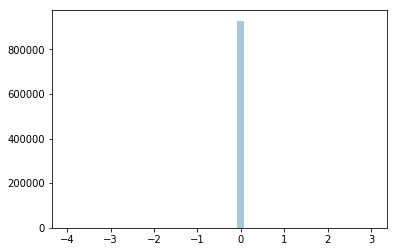

In [134]:
sns.distplot(diff_dataset, kde=False);

In [138]:
diff_dataset.value_counts()

 0    927780
 1       598
-1       597
-2         6
 2         5
 3         3
-3         1
-4         1
dtype: int64

Initially 5 Bits Where Required For Transimitting Any Number From 24 to 30

Now Using Delta Coding , we can transfer in 3 bits
based on using 2's complement method for representating signed integers

**8bits to 3bits or 5bits to 3bits**


In [156]:
new_df = {
    'normal' : int_dataset,
    'normal_binary' : int_dataset.apply(lambda x : decimalToBinary(x, 5)),
    'delta' : diff_dataset,
    '2s_comp' : diff_dataset.apply(lambda x : to_twoscomplement(3, x))
}

In [157]:
df = pd.DataFrame.from_dict(new_df)

In [160]:
df['normal'].value_counts()

27    430061
26    236970
28    163320
25     63323
29     19109
24     15465
30       743
Name: normal, dtype: int64

In [161]:
df['normal_binary'].value_counts()

11011    430061
11010    236970
11100    163320
11001     63323
11101     19109
11000     15465
11110       743
Name: normal_binary, dtype: int64

In [165]:
df['delta'].value_counts()

 0    927780
 1       598
-1       597
-2         6
 2         5
 3         3
-3         1
-4         1
Name: delta, dtype: int64

In [166]:
df['2s_comp'].value_counts()

000    927780
001       598
111       597
110         6
010         5
011         3
100         1
101         1
Name: 2s_comp, dtype: int64

# Previous Code For LDPC

In [74]:
a = [int(i) for i in new_dataset]

In [75]:
b = [int((i - int(i)) * 100) for i in new_dataset ]

In [76]:
c = [int((i* 100 - int(i*100)) * 100) for i in new_dataset ]

In [77]:
dic = {'int' : a , 'frac1' : b , 'frac2' : c}
df = pd.DataFrame(data=dic)

In [78]:
df.head()

,int,frac1,frac2
0,26,85,25
1,27,89,44
2,27,1,62
3,28,32,63
4,27,27,92


In [79]:
decimalToBinary(25)

'00011001'

In [80]:
distinct_a = list(set(a))
print(distinct_a)
distinct_a = [decimalToBinary(i) for i in distinct_a]


[24, 25, 26, 27, 28, 29, 30]


In [115]:
for j in range (0,256):
    k = decimalToBinary(j)
    current_a = [xorBinary(i,k) for i in distinct_a]
    current_a = [binaryToDecimal(i) for i in current_a]
    
    print(' ')
    print("Current Distinct Set : " , current_a)
    print("Key" , j)
    print(' ')

    if (collision_checker(current_a)):
        print("Found Key")
        print(k)
        break

        
        
        
# a_compressed = [compressBinary(decimalToBinary(i)) for i in a]
# b_compressed = [compressBinary(decimalToBinary(i)) for i in b]
# c_compressed = [compressBinary(decimalToBinary(i)) for i in c]

 
Current Distinct Set :  [24, 25, 26, 27, 28, 29, 30]
Key 0
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 1
Collisions :  [28]
Byte  : 0101
Count : 2
Collisions :  [29, 30]
Byte  : 0110
Count : 2
Collisions :  [24, 27]
Byte  : 0111
Count : 2
Collisions :  [25, 26]
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [25, 24, 27, 26, 29, 28, 31]
Key 1
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 2
Collisions :  [28, 31]
Byte  : 0101
Count : 1
Collisions :  [29]
Byte  

Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [6, 7, 4, 5, 2, 3, 0]
Key 30
 
Byte  : 0000
Count : 2
Collisions :  [0, 3]
Byte  : 0001
Count : 1
Collisions :  [2]
Byte  : 0010
Count : 2
Collisions :  [4, 7]
Byte  : 0011
Count : 2
Collisions :  [5, 6]
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [7, 6, 5, 4, 3, 2, 1]
Key 31
 
Byte  : 0000
Cou

Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [55, 54, 53, 52, 51, 50, 49]
Key 47
 
Byte  : 0000
Count : 1
Collisions :  [51]
Byte  : 0001
Count : 2
Collisions :  [49, 50]
Byte  : 0010
Count : 2
Collisions :  [52, 55]
Byte  : 0011
Count : 2
Collisions :  [53, 54]
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [40, 41, 42, 43, 44, 45, 46]
Key 48
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :

Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 2
Collisions :  [92, 95]
Byte  : 1101
Count : 2
Collisions :  [93, 94]
Byte  : 1110
Count : 2
Collisions :  [88, 91]
 
Current Distinct Set :  [94, 95, 92, 93, 90, 91, 88]
Key 70
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 2
Collisions :  [92, 95]
Byte  : 1101
Count : 2
Collision

Collisions :  [120, 123]
Byte  : 1011
Count : 2
Collisions :  [121, 122]
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [124, 125, 126, 127, 120, 121, 122]
Key 100
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 2
Collisions :  [124, 127]
Byte  : 1001
Count : 2
Collisions :  [125, 126]
Byte  : 1010
Count : 1
Collisions :  [120]
Byte  : 1011
Count : 2
Collisions :  [121, 122]
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [125, 124, 127, 126, 121, 120, 123]
Key 101
 
Byte  : 0000
Count : 0
Collisions : 

Key 130
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 2
Collisions :  [156, 159]
Byte  : 1101
Count : 1
Collisions :  [158]
Byte  : 1110
Count : 2
Collisions :  [152, 155]
 
Current Distinct Set :  [155, 154, 153, 152, 159, 158, 157]
Key 131
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count 

Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 1
Collisions :  [188]
Byte  : 1001
Count : 2
Collisions :  [189, 190]
Byte  : 1010
Count : 2
Collisions :  [184, 187]
Byte  : 1011
Count : 2
Collisions :  [185, 186]
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [185, 184, 187, 186, 189, 188, 191]
Key 161
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 2
Collisions :  [188, 191]
Byte  : 1001
Count : 1
Collisions :  [189]
Byte  : 1010
Count : 2
Collisions :  [184, 187]
By

Key 183
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 2
Collisions :  [172, 175]
Byte  : 1101
Count : 2
Collisions :  [173, 174]
Byte  : 1110
Count : 1
Collisions :  [171]
 
Current Distinct Set :  [160, 161, 162, 163, 164, 165, 166]
Key 184
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count 

Count : 0
Collisions :  []
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [214, 215, 212, 213, 210, 211, 208]
Key 206
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
Byte  : 0010
Count : 0
Collisions :  []
Byte  : 0011
Count : 0
Collisions :  []
Byte  : 0100
Count : 2
Collisions :  [208, 211]
Byte  : 0101
Count : 1
Collisions :  [210]
Byte  : 0110
Count : 2
Collisions :  [212, 215]
Byte  : 0111
Count : 2
Collisions :  [213, 214]
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [215, 214, 213, 212, 211, 210, 209]
Key 207
 
Byte  : 0000
Count : 0
Collisions :  []
Byte  : 0001
Count : 0
Collisions :  []
By

Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [244, 245, 246, 247, 240, 241, 242]
Key 236
 
Byte  : 0000
Count : 1
Collisions :  [240]
Byte  : 0001
Count : 2
Collisions :  [241, 242]
Byte  : 0010
Count : 2
Collisions :  [244, 247]
Byte  : 0011
Count : 2
Collisions :  [245, 246]
Byte  : 0100
Count : 0
Collisions :  []
Byte  : 0101
Count : 0
Collisions :  []
Byte  : 0110
Count : 0
Collisions :  []
Byte  : 0111
Count : 0
Collisions :  []
Byte  : 1000
Count : 0
Collisions :  []
Byte  : 1001
Count : 0
Collisions :  []
Byte  : 1010
Count : 0
Collisions :  []
Byte  : 1011
Count : 0
Collisions :  []
Byte  : 1100
Count : 0
Collisions :  []
Byte  : 1101
Count : 0
Collisions :  []
Byte  : 1110
Count : 0
Collisions :  []
 
Current Distinct Set :  [245, 244, 247, 246, 241, 240, 243]
Key 237
 
Byte  : 0000
Count : 2
Collisions :  [240, 243]
Byte  : 0001
Count : 1
Collisions :  [241]
Byte  : 0010
Count : 2
Collisions :  [244, 247]
Byte  : 0011
Count : 2
Collisions :  [245, 246]
By

In [57]:
df['int'].unique()

array([26, 27, 28, 25, 29, 24, 30], dtype=int64)

In [112]:
def collision_checker(distinct) : 
    flag1 = 0
    for i in range(0,15) : 
        binary = decimalToBinary(i)[-4:]
        outputs = ['']
        for bit in binary :
            if(bit == '1') :
                temp1 = [j + '01' for j in outputs]
                temp2 = [j + '10' for j in outputs]
                outputs = temp1 + temp2
            if(bit == '0') :
                temp1 = [j + '00' for j in outputs]
                temp2 = [j + '11' for j in outputs]
                outputs = temp1 + temp2  
        
        outputs = [binaryToDecimal(h) for h in outputs]
        collisions = []
#         print("Output For Binary" , binary , "is" ,outputs_decimal)
        flag = 0
        count = 0 
        for item in outputs : 
            if item in distinct :
                count+=1
                collisions.append(item)
                flag=1
        
#         if(count > 1) :
        print("Byte  : " + str(binary))
        print("Count : "  + str(count))
        print("Collisions : " , collisions)
    
        
        if flag==1:
            flag1 = 1
            
    return 0 if flag1==1 else 1        

In [ ]:
collision_checker(20,30)

In [18]:
# print(compressBinary(decimalToBinary(26.2257,16)))
# print(binaryToDecimal(decimalToBinary(26.2257,16),23))
# print("\n\n")

# for i in range(0,20):
#   print(i)
#   print(binaryToDecimal(decimalToBinary(article_read.temperature[i],16),23))
#   print(article_read.temperature[i])
